In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import csv
import glob


In [3]:
res = {}
for p in [2]:
    res[p] = {}
    for r in [3, 4]:
        try:
            with open(f"./results/Hamiltonian_ibm_kyiv_0/16_0/{p=}/results_{r=}.csv", 'r') as f:
                rd = csv.DictReader(f, delimiter=';', quotechar="'")
                res[p][r] = list(rd)
        except FileNotFoundError:
            pass

In [4]:
ref = np.load(f"./problems/transfer_Hamiltonian_ibm_kyiv_0_angles_16_0_p_5.pkl", allow_pickle=True)
ref['beta'] = [0.48912372014861294, 0.2736708779840032] 
ref['gamma'] = [2.955984139930106, 2.8123696023056692]



In [5]:
ref_ev = {}
for i0, v in np.loadtxt("/home/marek/hex/results/Hamiltonian_ibm_kyiv_0/16_0/mps_p=2/h_kiev_p2_16_0.txt"):
    ref_ev[int(i0),] = v
for i0, i1, v in np.loadtxt("/home/marek/hex/results/Hamiltonian_ibm_kyiv_0/16_0/mps_p=2/J_kiev_p2_16_0.txt"):
    ref_ev[int(i0), int(i1)] = v
for i0, i1, i2, v in np.loadtxt("/home/marek/hex/results/Hamiltonian_ibm_kyiv_0/16_0/mps_p=2/ZZZ_kiev_p2_16_0.txt"):
    ref_ev[int(i0), int(i1), int(i2)] = v
print(len(ref_ev))

342


In [6]:
res = {}
for ff in glob.glob("/home/marek/hex/results/Hamiltonian_ibm_kyiv_0/16_0/p=2/*.npy"):
    fff = ff.split("/")[-1]
    ggg = fff[10:-4].split("_")
    pp = int(ggg[0])
    rr = int(ggg[1].split("=")[1])
    DD = int(ggg[2].split("=")[1])
    cc = int(ggg[-1].split("=")[1])
    ind = (pp, rr, DD, cc)
    res[ind] = np.load(ff, allow_pickle=True).item()

In [30]:
res.keys()

dict_keys([(2, 3, 4, 1), (2, 3, 4, 4), (2, 3, 4, 2), (2, 3, 4, 8), (2, 3, 4, 16), (2, 3, 4, 32)])

In [7]:
dres = {}
for k, ev in res.items():
    assert len(ev) == len(ref_ev)
    dres[k] = max(abs(ref['H'][ii] * ev[ii] - ref_ev[ii]) for ii in ref_ev)


In [ ]:
dres2 = {}
for k, ev in res.items():
    assert len(ev) == len(ref_ev)
    dres[k] = max(abs(ref['H'][ii] * ev[ii] - ref_ev[ii]) for ii in ref_ev)

Text(0.5, 1.0, 'MPS p=2 vs PEPS D=4')

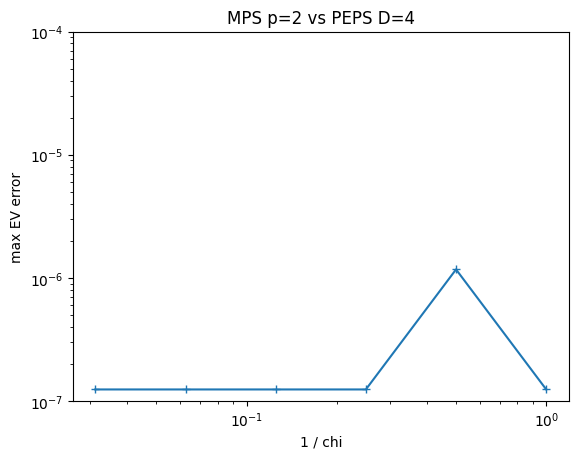

In [39]:
xx = [1 / k[3] for k in sorted(dres.keys())]
yy = list(dres[k] for k in sorted(dres.keys()))

plt.loglog(xx, yy, '+-')
plt.ylim([1e-7, 1e-4])
plt.xlabel("1 / chi")
plt.ylabel("max EV error")
plt.title("MPS p=2 vs PEPS D=4")